In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = 'model_create/object_positions_12300.csv'
model_weights_save_path = 'model_create/classification.weights.h5'

In [3]:
NUM_CLASSES = 8
RANDOM_SEED = 46

In [4]:
wrist = list(range(1, 1 * 3 + 1))
index = list(range(1 * 3 + 1, 6 * 3 + 1))
little = list(range(11 * 3 + 1, 16 * 3 + 1))
middle = list(range(21 * 3 + 1, 26 * 3 + 1))
palm = list(range(31 * 3 + 1, 32 * 3 + 1))
ring = list(range(33 * 3 + 1, 38 * 3 + 1))
thumb = list(range(43 * 3 + 1, 47 * 3 + 1))
hand = wrist + index + little + middle + palm + ring + thumb

In [5]:
print(wrist)
print(index)
print(little)
print(middle)
print(palm)
print(ring)
print(thumb)
print(hand)
print(len(hand))

[1, 2, 3]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[94, 95, 96]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 94, 95, 96, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]
78


In [6]:
x_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=hand)
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((26 * 3, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(78, activation='relu'),
    tf.keras.layers.Dense(156, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(130, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(104, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(78, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(52, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(26, activation='relu'),
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 78)             │           312 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 78)             │         6,162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 156)            │        12,324 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 156)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 130)            │        20,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 104)            │        13,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 78)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 78)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 52)             │         4,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 26)             │         1,378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,724 (260.64 KB)

 Trainable params: 66,568 (260.03 KB)

 Non-trainable params: 156 (624.00 B)

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_weights_save_path,
    verbose=1,
    save_weights_only=True)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20,
                                               verbose=1)

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
61/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1586 - loss: 2.0548
Epoch 1: saving model to model_create/classification.weights.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1660 - loss: 2.0423 - val_accuracy: 0.2836 - val_loss: 1.9912
Epoch 2/1000
58/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3147 - loss: 1.6167
Epoch 2: saving model to model_create/classification.weights.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3201 - loss: 1.5846 - val_accuracy: 0.2193 - val_loss: 1.8649
Epoch 3/1000
51/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4274 - loss: 1.1945
Epoch 3: saving model to model_create/classification.weights.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4404 - loss: 1.1773 - val_accuracy: 0.1337 - val_loss: 1.8670
Epoch 4/1000
54/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6117 - loss: 0.8892
Epoch 4: saving model to model_create/classification.weights.h5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.61

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9988 - loss: 0.0053


In [15]:
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0.0000000e+00 5.9253612e-34 9.2032883e-26 4.7015124e-26 4.1719181e-14
 1.0000000e+00 1.2313279e-35 0.0000000e+00]
5


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


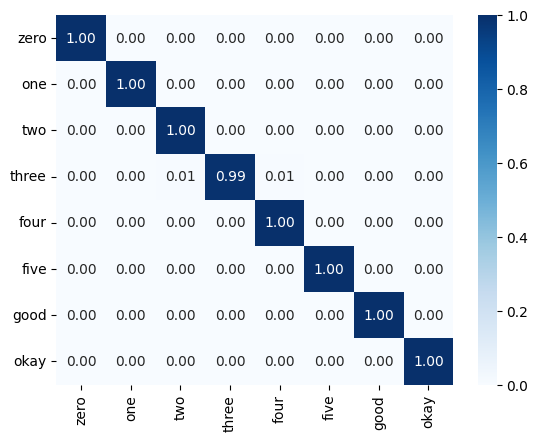

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       529
           2       1.00      1.00      1.00       594
           3       0.99      0.99      0.99       199
           4       1.00      1.00      1.00       499
           5       1.00      1.00      1.00       502
           6       1.00      1.00      1.00       266
           7       1.00      1.00      1.00       183

    accuracy                           1.00      3082
   macro avg       1.00      1.00      1.00      3082
weighted avg       1.00      1.00      1.00      3082



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    cmx_data = cmx_data.astype('float') / cmx_data.sum(axis=1)[:, np.newaxis]

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots()
    sns.heatmap(df_cmx, annot=True, fmt='.2f', cmap='Blues')
    ax.set_ylim(len(set(y_true)), 0)
    #plt.xlabel('Predicted'); plt.ylabel('True')
    ax.xaxis.set_ticklabels(['zero', 'one', 'two', 'three', 'four', 'five', 'good', 'okay'])
    ax.yaxis.set_ticklabels(['zero', 'one', 'two', 'three', 'four', 'five', 'good', 'okay'])
    ax.tick_params(axis='x', labelrotation=90)
    ax.tick_params(axis='y', labelrotation=0)

    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [17]:
pb_save_path = 'model_create/classification.pb'
model_h5_path = 'model_create/classification.h5'
#model.save(pb_save_path, save_format='tf')
model.save(model_h5_path)

In [18]:
tf.saved_model.save(model, pb_save_path)

INFO:tensorflow:Assets written to: model_create/classification.pb\assets


INFO:tensorflow:Assets written to: model_create/classification.pb\assets


In [19]:
#!zip -r classification.zip /model_create/classification.pb/  # 압축

In [20]:
# Convert Model
tflite_save_path = 'model_create/classification.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SBwhq\AppData\Local\Temp\tmpmmnlal4v\assets


INFO:tensorflow:Assets written to: C:\Users\SBwhq\AppData\Local\Temp\tmpmmnlal4v\assets


Saved artifact at 'C:\Users\SBwhq\AppData\Local\Temp\tmpmmnlal4v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 78), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  2630595578512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595580624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630578894832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595576224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595587312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595586256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595588720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595589952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595589424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595726672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2630595584144:

80816